Chapter 26
# 二维数据分别朝16个不同方向投影
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.covariance import EmpiricalCovariance
from matplotlib.pyplot import cm

## 自定义函数

In [2]:
def normal_pdf_1d(x, mu,sigma):
    
    # 一元高斯分布PDF
    scaling = 1/sigma/np.sqrt(2*np.pi)
    z = (x - mu)/sigma
    pdf = scaling*np.exp(-z**2/2)
    
    return pdf
    

## 创建数据

In [3]:
cov = np.array([[1, 0.86], 
                [0.86, 1]])
x1 = np.random.multivariate_normal([0, 0], cov, size=118)

xx_maha, yy_maha = np.meshgrid(
            np.linspace(-20,20, 400),
            np.linspace(-20,20, 400),)
zz_maha = np.c_[xx_maha.ravel(), yy_maha.ravel()]

emp_cov_Xc = EmpiricalCovariance().fit(x1)

mahal_sq_Xc = emp_cov_Xc.mahalanobis(zz_maha)

mahal_sq_Xc = mahal_sq_Xc.reshape(xx_maha.shape)
mahal_d_Xc = np.sqrt(mahal_sq_Xc)

## 可视化

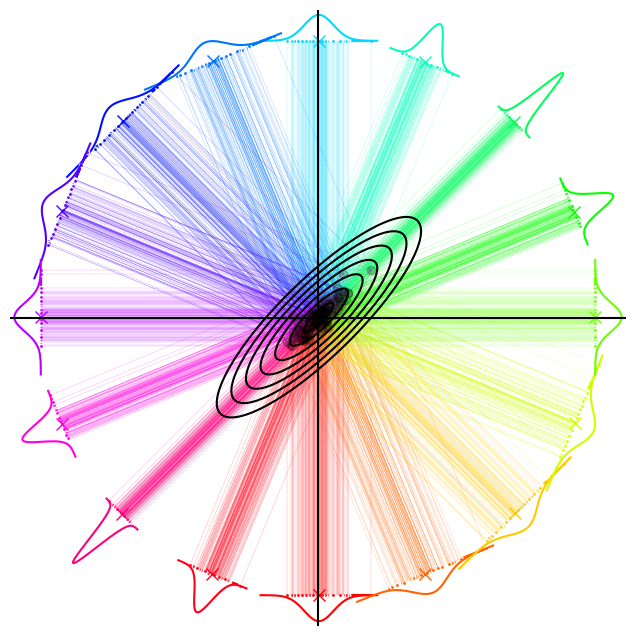

In [12]:
theta_array = np.linspace(0, 360, num = 16, endpoint= False)
# 定义16个不同投影角度

colors = cm.hsv(np.linspace(0, 1, len(theta_array)))

fig, ax = plt.subplots(figsize = (8,8))

# 绘制质心
plt.plot(x1[:,0].mean(),x1[:,1].mean(), 
         marker = 'x',
         color = 'k', 
         markersize = 18)

for idx, theta in enumerate(theta_array):
    
    color_idx = colors[idx]
    theta = theta*np.pi/180
    
    # 投影方向，用列向量表示
    v1 = np.array([[np.cos(theta)],
                   [np.sin(theta)]])
    
    alpha = theta - np.pi/2
    
    proj = v1@v1.T
    
    # 距离
    R = 18
    p0 = R*np.array([[np.cos(alpha)],
                     [np.sin(alpha)]])
    
    # 朝不过原点的直线投影结果，二维平面
    z1_2D = x1 @ proj + p0.T @ (np.eye(2) - proj)
    
    # 投影数据，一维数组
    z1_1D = x1@v1
    
    # 计算投影数据均值和标准差
    mu1 = z1_1D.mean()
    std1 = z1_1D.std()
    
    
    x1_array = np.linspace(mu1 - 4*std1,mu1 + 4*std1,100)
    
    # 旋转矩阵
    R1 = np.array([[np.cos(theta), np.sin(theta)],
                  [-np.sin(theta), np.cos(theta)]])
    
    pdf1_array = normal_pdf_1d(x1_array,mu1,std1)*4
    # 乘4放大PDF曲线高度
    
    PDF1 = np.column_stack((x1_array,-pdf1_array))
    
    # 一元高斯曲线的几何变换
    PDF1_v1 = PDF1@R1 + p0.T

    # 绘制投影结果
    plt.plot(z1_2D[:,0],z1_2D[:,1], marker = '.', 
             markersize = 6, 
             color = color_idx,
             markeredgecolor = 'w')
    plt.plot(([i for (i,j) in z1_2D], [i for (i,j) in x1]),
              ([j for (i,j) in z1_2D], [j for (i,j) in x1]),
             c=color_idx, lw = 0.1)
    plt.plot(PDF1_v1[:,0],PDF1_v1[:,1], 
             color = color_idx)
    
    # 绘制投影质心
    plt.plot(z1_2D[:,0].mean(),z1_2D[:,1].mean(), 
             marker = 'x',
             color = color_idx,
             markersize = 8)

# 绘制马氏距离等高线
plt.contour(xx_maha, yy_maha, mahal_d_Xc, 
            colors='k', 
            levels=np.arange(1,8), 
            zorder = 1000)

# 绘制散点数据
plt.scatter(x1[:,0],x1[:,1], 
            alpha = 0.2,
            c = 'k', zorder = 1000)

ax.axvline(x = 0, c = 'k')
ax.axhline(y = 0, c = 'k')
ax.axis('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower = -20, upper = 20)
ax.set_ybound(lower = -20, upper = 20)
